In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

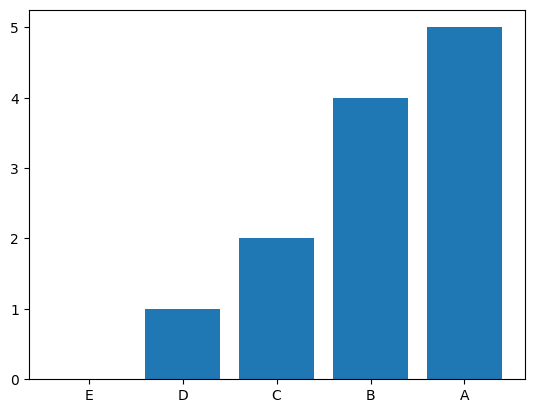

In [2]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
data = [0, 1, 2, 4, 5]

ax.bar(labels, data)

<BarContainer object of 5 artists>

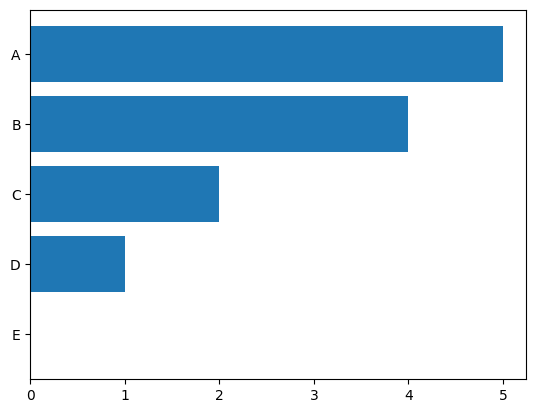

In [3]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
data = [0, 1, 2, 4, 5]

ax.barh(labels, data)

In [4]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"})

housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [5]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin").sort_index()
)

ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [6]:
total_sold = (ca_housing
 .groupby("region_name")
 .agg({"total_homes_sold":"sum"})
 .sort_values("total_homes_sold", ascending=False)
 .iloc[:10])

total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


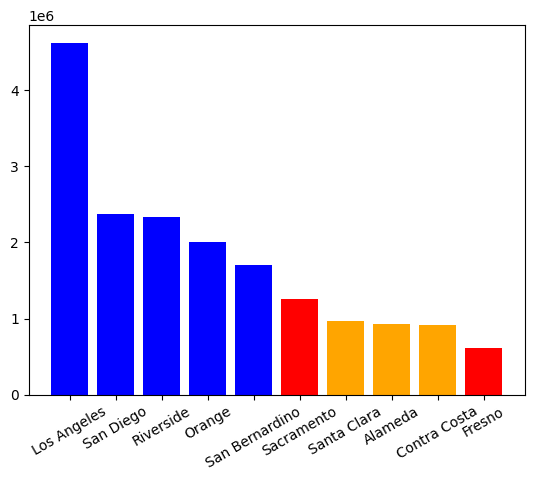

In [7]:
fig, ax = plt.subplots()

colors = [
    "blue", 
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index, 
       height=total_sold["total_homes_sold"],
       color=colors
)

ax.xaxis.set_tick_params(rotation=30)

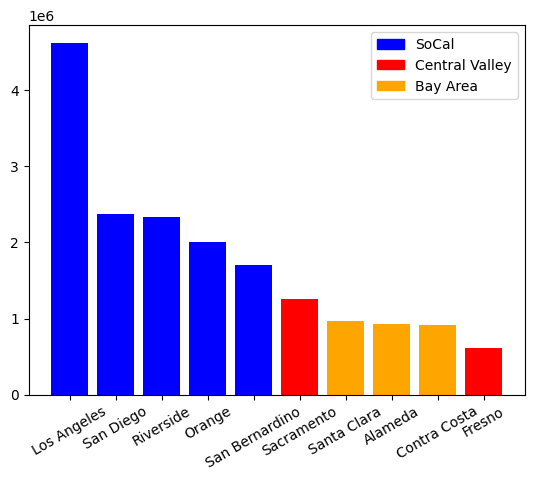

In [8]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

colors = [
    "blue", 
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index, 
       height=total_sold["total_homes_sold"],
       color=colors
)

socal = mpatches.Patch(color='blue', label='SoCal')
central = mpatches.Patch(color='red', label='Central Valley')
bay = mpatches.Patch(color='orange', label='Bay Area')

plt.legend(handles=[socal, central, bay], loc="upper right")
ax.xaxis.set_tick_params(rotation=30)